<a href="https://colab.research.google.com/github/Nhutsang/Baocaogiuaky/blob/main/CNNFood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
%cd /content/drive/MyDrive/TrainAI/Food

/content/drive/MyDrive/TrainAI/Food


In [26]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [27]:
# Tạo bộ dữ liệu training set
training_set=train.flow_from_directory('/content/drive/MyDrive/TrainAI/Food/datatrain',
                                               target_size=(200,200), batch_size=32, class_mode='categorical' )

Found 100 images belonging to 10 classes.


In [28]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Bánh căn': 0,
 'Bánh khọt': 1,
 'Bánh mì': 2,
 'Bánh xèo': 3,
 'Bún bò': 4,
 'Chè thái': 5,
 'Cơm chiên': 6,
 'Cơm sườn': 7,
 'Hủ tiếu': 8,
 'Phở': 9}

In [29]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same',input_shape=(200,200,3))) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(64,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(256,activation='linear',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(10,activation='softmax'))

# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
     

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                  

In [30]:
food = model.fit_generator( training_set, epochs=50, steps_per_epoch=len(training_set)
)

<ipython-input-30-9118cd73fe4b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  food = model.fit_generator( training_set, epochs=50, steps_per_epoch=len(training_set)


Epoch 1/50
4/4 [==============================] - 25s 6s/step - loss: 20.7396 - accuracy: 0.0800
Epoch 2/50
4/4 [==============================] - 12s 3s/step - loss: 7.4298 - accuracy: 0.1500
Epoch 3/50
4/4 [==============================] - 12s 4s/step - loss: 2.8374 - accuracy: 0.2500
Epoch 4/50
4/4 [==============================] - 13s 2s/step - loss: 2.1943 - accuracy: 0.3200
Epoch 5/50
4/4 [==============================] - 13s 3s/step - loss: 1.8982 - accuracy: 0.3800
Epoch 6/50
4/4 [==============================] - 14s 4s/step - loss: 1.5940 - accuracy: 0.4800
Epoch 7/50
4/4 [==============================] - 13s 3s/step - loss: 1.4900 - accuracy: 0.4400
Epoch 8/50
4/4 [==============================] - 12s 4s/step - loss: 1.4948 - accuracy: 0.5200
Epoch 9/50
4/4 [==============================] - 12s 3s/step - loss: 1.1380 - accuracy: 0.5900
Epoch 10/50
4/4 [==============================] - 12s 4s/step - loss: 1.4814 - accuracy: 0.4900
Epoch 11/50
4/4 [=====================

In [31]:
model.save('/content/drive/MyDrive/TrainAI/modelfood')

<function matplotlib.pyplot.show(close=None, block=None)>

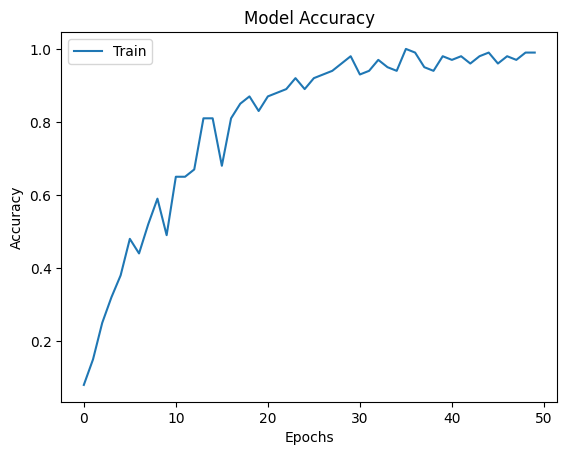

In [37]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(food.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'])
plt.show

In [41]:
model1= load_model('/content/drive/MyDrive/TrainAI/modelfood')

1/1 [==============================] - 0s 74ms/step
Bánh căn


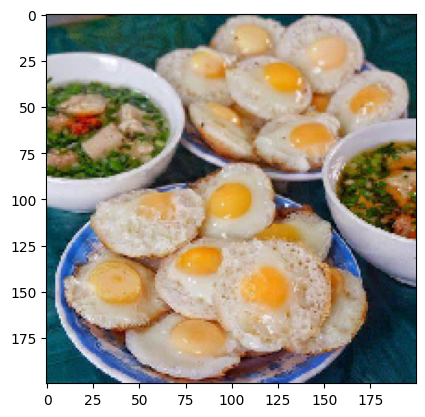

In [44]:
test="/content/drive/MyDrive/TrainAI/Food/Check"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(200,200))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model1.predict(img).argmax())
  class_name=['Bánh căn', 'Bánh khọt','Bánh mì','Bánh xèo', 'Bún bò', 'Chè thái', 'Cơm chiên', 'Cơm sườn', 'Hủ tiếu', 'Phở']
  print(class_name[result])
  plt.show()

In [49]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1]*100,'%')


Train Loss 0.008176696486771107
Train Accuracy 100.0 %
